<a href="https://colab.research.google.com/github/MustafaAbbasi98/Deep-Learning-Projects/blob/main/Google%20Play%20Store%20App%20Analysis%20and%20Modeling/Google_Play_Store_Apps_Analysis_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Play Store Apps EDA and Ratings Prediction

**Note: This project was done as part of a final group project for my Introductory Data Science course at LUMS. Credit goes to my fellow colleagues as well including Shahzeb, Mahad, and Suleiman.**

Please download the file from the following Kaggle dataset:
https://www.kaggle.com/datasets/lava18/google-play-store-apps

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, FunctionTransformer, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, HuberRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['googleplaystore.csv']))
print(df.shape)
df.head(10)

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


# Data Cleaning

In [ ]:
df.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

In [ ]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [ ]:
df['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [ ]:
df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [ ]:
bool_series = pd.isnull(df["Type"])
df[bool_series]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:

bool_series = pd.isnull(df["Content Rating"])
df[bool_series]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df.drop(10472, inplace=True)
df.iloc[9148,6] = "Free"

In [ ]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
df['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
516k                     1
50k                      1
103k                     1
444k                     1
754k                     1
Name: Size, Length: 461, dtype: int64

In [ ]:
df['Price'].value_counts()

0          10040
$0.99        148
$2.99        129
$1.99         73
$4.99         72
           ...  
$1.96          1
$109.99        1
$1.04          1
$1.75          1
$19.90         1
Name: Price, Length: 92, dtype: int64

In [ ]:
df['Price'] = df['Price'].str.replace('$', '')

Cleaning up **size** column

In [ ]:
df['Size'] = df['Size'].str.replace('M', 'e6')
df['Size'] = df['Size'].str.replace('k', 'e3')
df['Size'] = df['Size'].replace('Varies with device', np.nan).astype(float) #Replacing 'Varies with device' with 'nan' for now
df['Size'] = df['Size'].astype('Int64')

In [ ]:
df['Size']

0        19000000
1        14000000
2         8700000
3        25000000
4         2800000
           ...   
10836    53000000
10837     3600000
10838     9500000
10839         NaN
10840    19000000
Name: Size, Length: 10840, dtype: Int64

Cleaning up `Genres` column

*   There are two genres seperated by a `;`. However, some apps don't have a secondary genre. So i am dropping the secondary genre.




In [ ]:
df['Genres'] = df['Genres'].str.split(';').str[0]

Cleaning up `Content Rating` column.
- Two apps are Unrated. I am dropping both of them

In [ ]:
df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [ ]:
df[df['Content Rating'] == 'Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7312,Best CG Photography,FAMILY,NaN,1,2500000,500+,Free,0,Unrated,Entertainment,"June 24, 2015",5.2,3.0 and up
8266,DC Universe Online Map,TOOLS,4.1,1186,6400000,"50,000+",Free,0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


In [ ]:
df = df[df['Content Rating'] != 'Unrated']

Clean `Installs` column

In [ ]:
df['Installs'] = df['Installs'].str.replace(r'[,+]', '')

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0,Everyone,Art & Design,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0,Everyone,Art & Design,"June 20, 2018",1.1,4.4 and up


In [ ]:
df['App'] = df['App'].astype('str')
df['Category'] = df['Category'].astype('category')
df['Reviews'] = df['Reviews'].astype('int')
df['Size'] = df['Size'].astype('float')
df['Installs'] = df['Installs'].astype('int')
df['Type'] = df['Type'].astype('category')
df['Price'] = df['Price'].astype('float')
df['Content Rating'] = df['Content Rating'].astype('category')
df['Genres'] = df['Genres'].astype('category')

In [ ]:
df.dtypes

App                 object
Category          category
Rating             float64
Reviews              int64
Size               float64
Installs             int64
Type              category
Price              float64
Content Rating    category
Genres            category
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

# Data Vizualization

Text(0.5, 1.0, 'Distribution of Ratings')

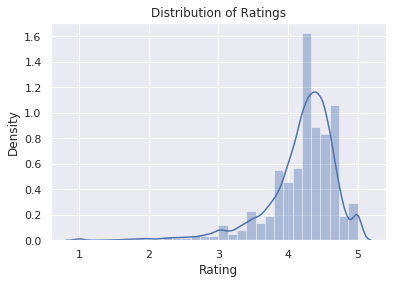

In [ ]:
ax = sns.distplot(df['Rating'].dropna(), bins=30)
ax.set_ylabel('Density')
ax.set_title('Distribution of Ratings')

Observations:

*   Skewed left
*   Unimodal
*   Few outliers





Text(0.5, 1.0, 'Distribution of App Reviews')

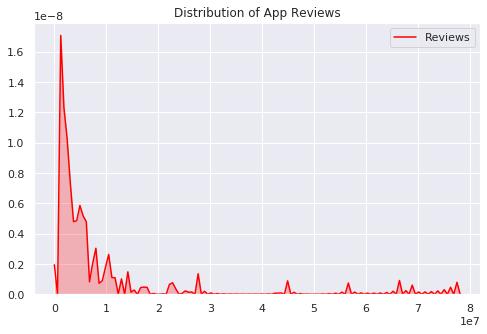

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.kdeplot(df['Reviews'], color='red', shade=True,)
ax.set_title('Distribution of App Reviews')

Observations:

*   Skewed Right
*   Most apps have low number of reviews (makes sense)
*   Large number of outliers (may make big difference in rating!)





Text(0.5, 1.0, 'Counts of Free and Paid Apps')

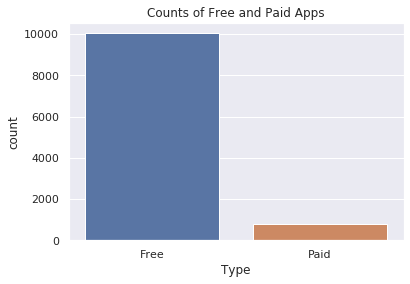

In [ ]:
ax = sns.countplot(x="Type", data=df)
ax.set_title('Counts of Free and Paid Apps')

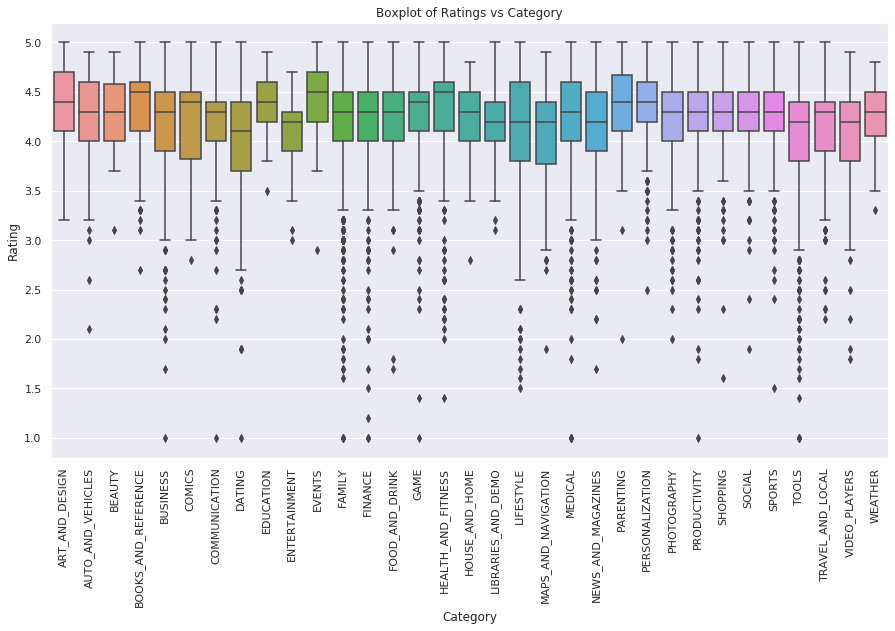

In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x='Category', y='Rating', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Boxplot of Ratings vs Category')
plt.show()

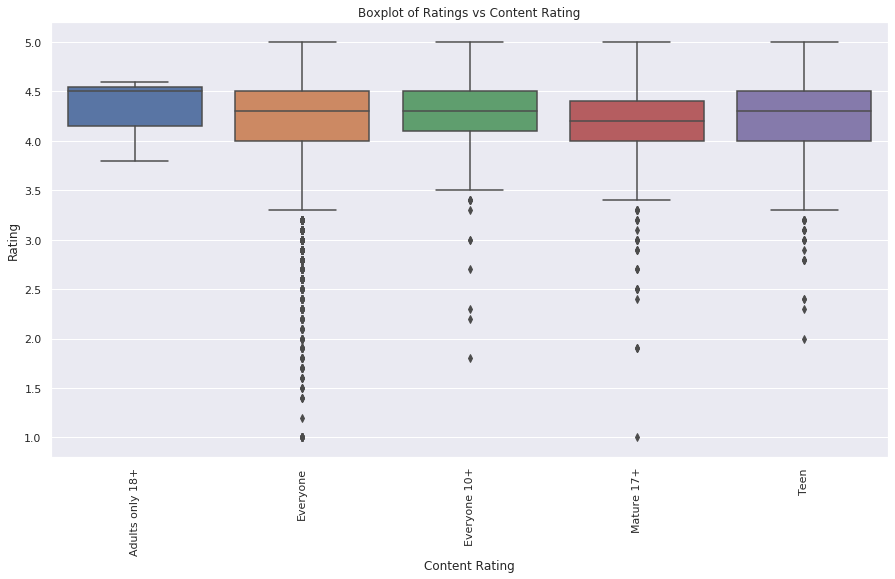

In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x='Content Rating', y='Rating', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Boxplot of Ratings vs Content Rating')
plt.show()

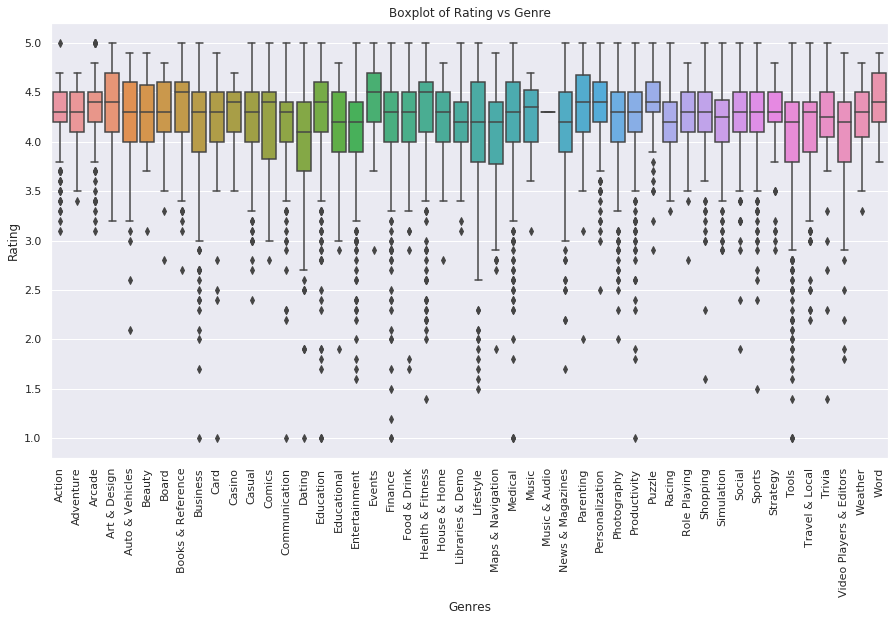

In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x='Genres', y='Rating', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Boxplot of Rating vs Genre')
plt.show()

## `Type` vs `Rating`

1.   Paid apps seem to get higher ratings on average
2.   Variance of ratings is approximately same for paid and free apps

Could this be just due to chance? Might be able to perform hypothesis testing over here

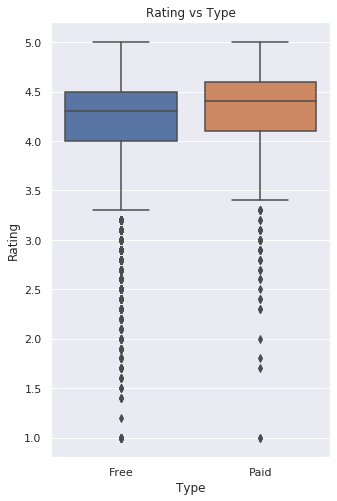

In [ ]:
plt.figure(figsize=(5, 8))
ax = sns.boxplot(x='Type', y='Rating', data=df)
ax.set_title('Rating vs Type')
plt.show()

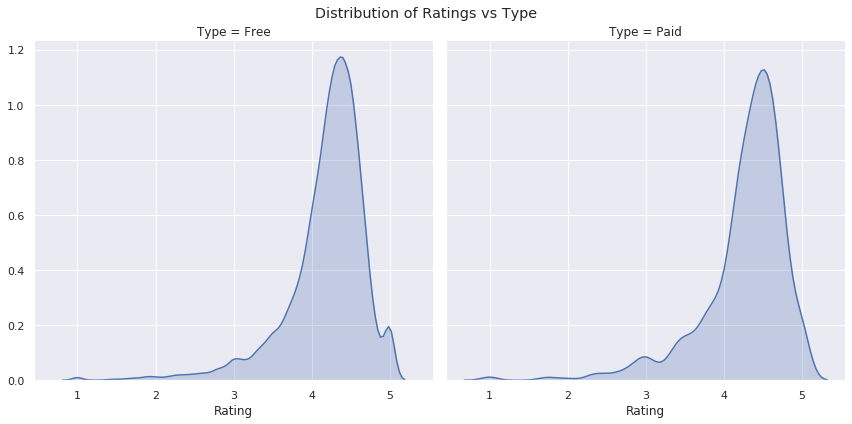

In [ ]:
g = sns.FacetGrid(data=df, col='Type', height=6)
g.map(sns.kdeplot, 'Rating', shade=True)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Ratings vs Type')
plt.show()

# `Reviews` vs `Rating`

*   It seems that to some extent, apps with higher reviews correspond to higher ratings.
*   However, there are apps with very few reviews but still a large rating. Thus, reviews in itself may not be a very strong feature for predicted prices.



Text(0.5, 1.0, 'Rating vs Reviews')

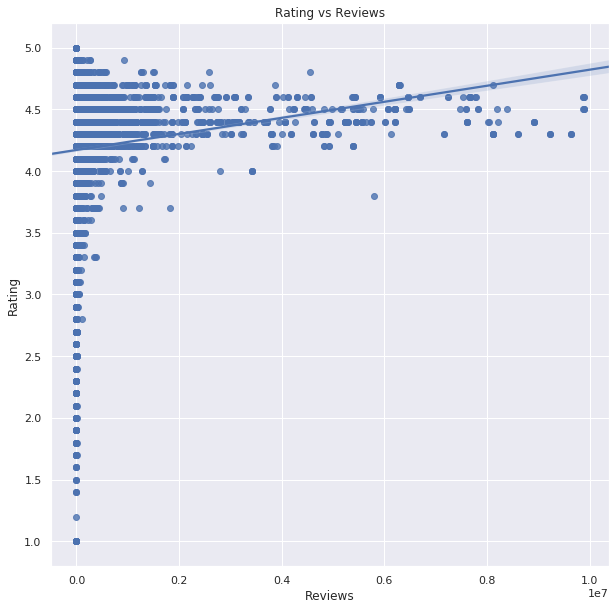

In [ ]:
plt.figure(figsize=(10, 10))
ax = sns.regplot(x='Reviews', y='Rating', data=df[df['Reviews'] < 10000000])
ax.set_title('Rating vs Reviews')

## `Rating` vs `Price` for paid apps:

*   Higher prices clearly lead to lower ratings
*   Price most probably a strong feature for predicting rating



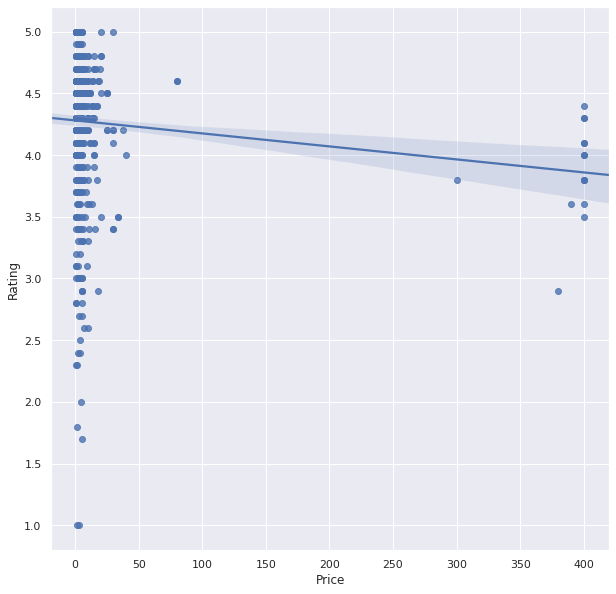

In [ ]:
plt.figure(figsize=(10, 10))
sns.regplot(x='Price', y='Rating', data=df[df['Type']=='Paid'])
ax.set_title('Rating vs Price')
plt.show()

# `Rating` vs `Size`

*   Size does not seem to affect Rating significantly


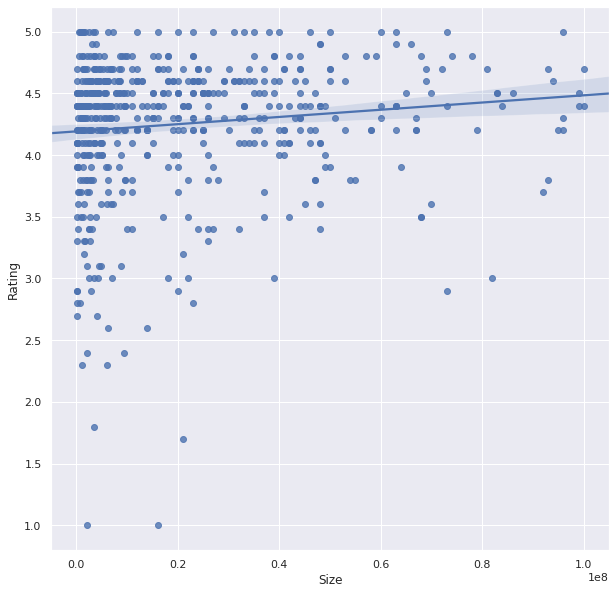

In [ ]:
plt.figure(figsize=(10, 10))
sns.regplot(x='Size', y='Rating', data=df[df['Type']=='Paid'])
ax.set_title('Rating vs Size')
plt.show()

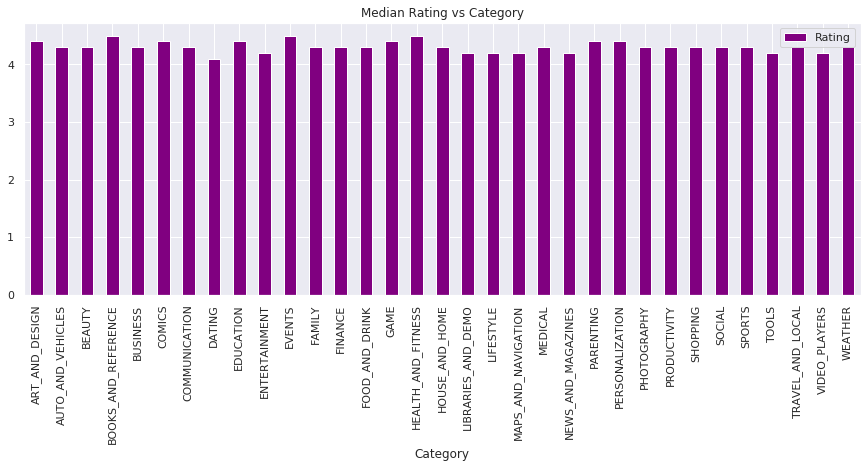

In [ ]:
df[['Category', 'Rating']].groupby('Category').median().plot(kind='bar', figsize=(15,5), color='purple', title='Median Rating vs Category')

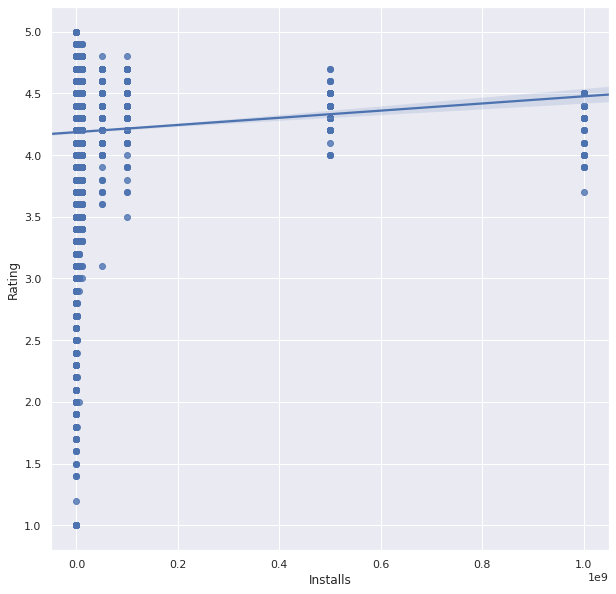

In [ ]:
plt.figure(figsize=(10, 10))
sns.regplot(x='Installs', y='Rating', data=df)
ax.set_title('Rating vs Installs')
plt.show()

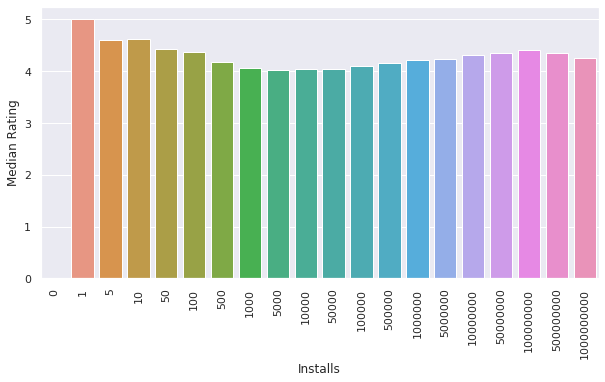

In [ ]:
plt.figure(figsize=(10, 5))
ax=sns.barplot(x='Installs', y='Rating', data=df[['Rating', 'Installs']].groupby('Installs').mean().reset_index())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel('Median Rating')
plt.show()

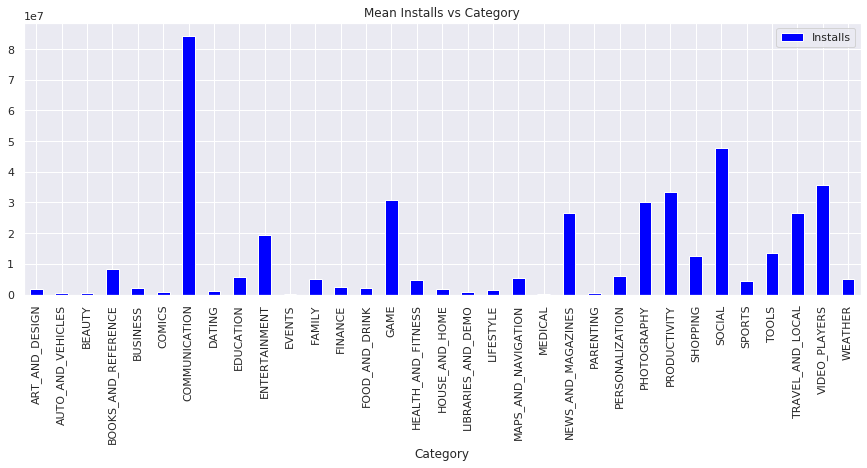

In [ ]:
df[['Category', 'Installs']].groupby('Category').mean().plot(kind='bar', figsize=(15,5), color='blue', title='Mean Installs vs Category')

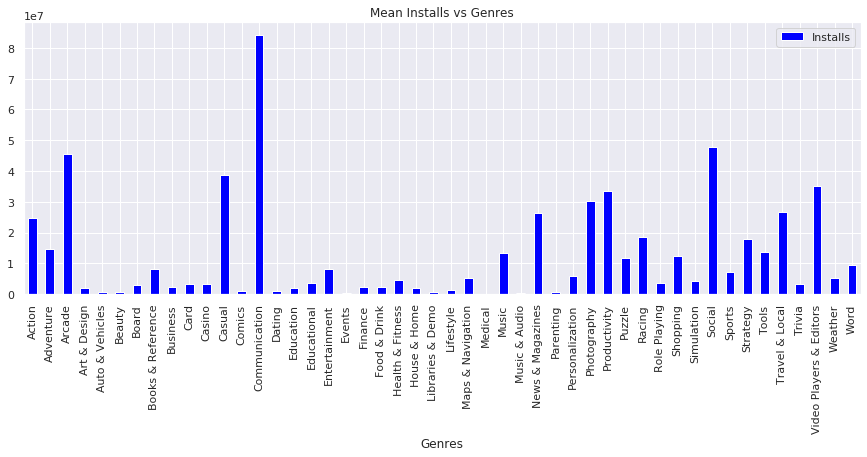

In [ ]:
df[['Genres', 'Installs']].groupby('Genres').mean().plot(kind='bar', figsize=(15,5), color='blue', title='Mean Installs vs Genres')

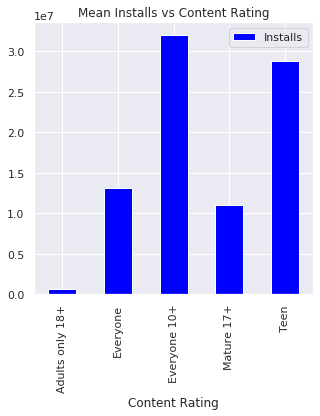

In [ ]:
df[['Content Rating', 'Installs']].groupby('Content Rating').mean().plot(kind='bar', figsize=(5,5), color='blue', title='Mean Installs vs Content Rating')

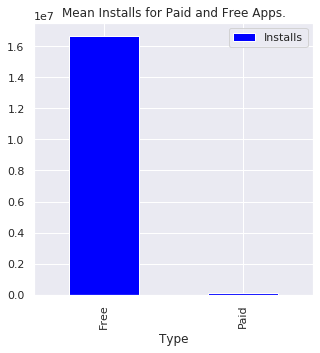

In [ ]:
df[['Type', 'Installs']].groupby('Type').mean().plot(kind='bar', figsize=(5,5), color='blue', title='Mean Installs for Paid and Free Apps.')

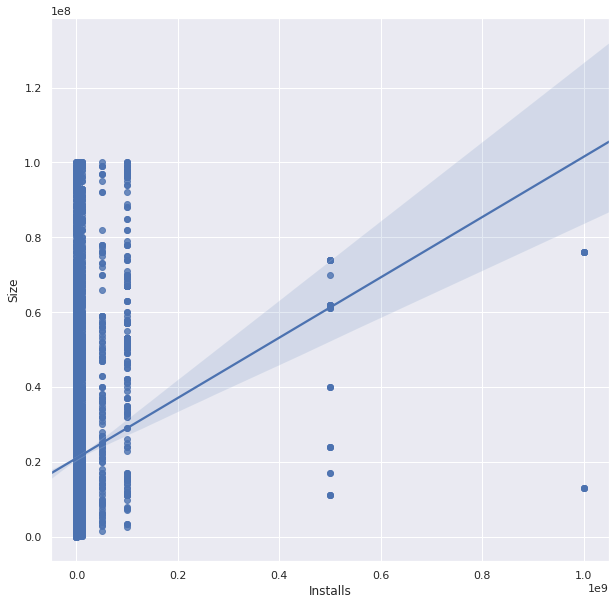

In [ ]:
plt.figure(figsize=(10, 10))
sns.regplot(x='Installs', y='Size', data=df)
ax.set_title('Installs vs Size')
plt.show()

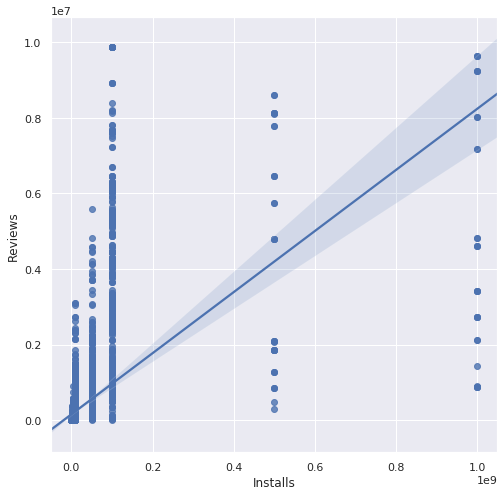

In [ ]:
plt.figure(figsize=(8, 8))
sns.regplot(x='Installs', y='Reviews', data=df[df['Reviews'] < 10000000])
ax.set_title('Installs vs Reviews')
plt.show()

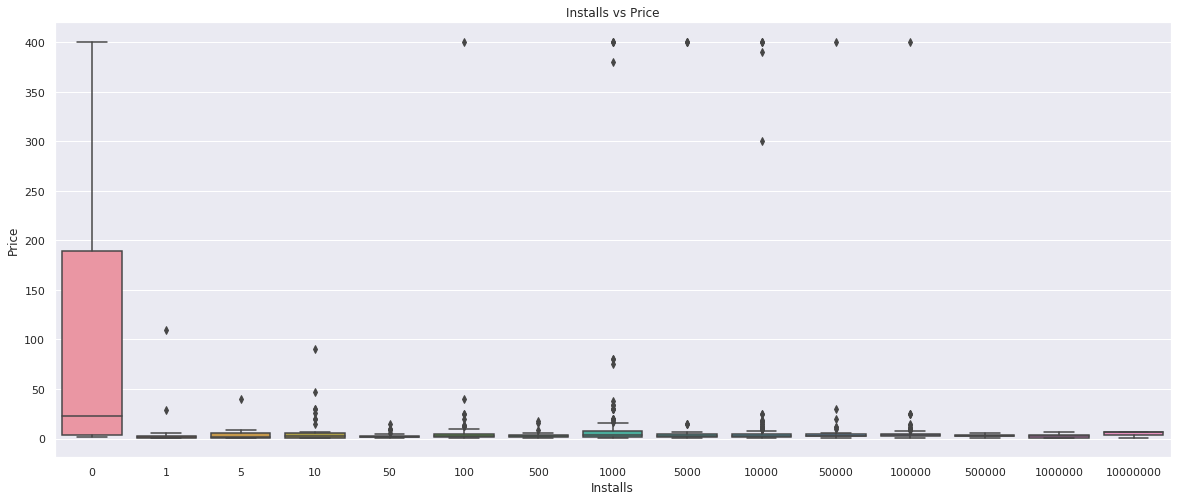

In [ ]:
plt.figure(figsize=(20, 8))
ax = sns.boxplot(x='Installs', y='Price', data=df[df['Type'] == 'Paid'])
ax.set_title('Installs vs Price')
plt.show()

# Machine Learning

Dropping `App Name`, `Last Updated`, `Android Ver` and `Current Ver` since they are uninformative for predicting app rating.

In [ ]:
df = df.drop(['Last Updated', 'Current Ver', 'Android Ver', 'App'], axis='columns')
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design


In [ ]:
df = df.dropna(how='any')
df.isna().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [ ]:
X = df.drop('Rating', axis='columns')
Y = df.Rating

In [ ]:
X.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,159,19000000.0,10000,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,967,14000000.0,500000,Free,0.0,Everyone,Art & Design
2,ART_AND_DESIGN,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design
4,ART_AND_DESIGN,967,2800000.0,100000,Free,0.0,Everyone,Art & Design


In [ ]:
Y.head()

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

Dividing data into train/test split for subsequent evaluation.

In [ ]:
test_size = 0.3

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)


1.   Need to OneHotEncode all categorical columns.
2.   Will Standardize numerical columns to zero mean, unit variance



In [ ]:
cat_cols = df.columns[df.dtypes == 'category'].values
cat_cols

array(['Category', 'Type', 'Content Rating', 'Genres'], dtype=object)

In [ ]:
column_trans = ColumnTransformer(
    [('cat_feats', OneHotEncoder(drop='first', sparse=False), cat_cols),
     ('log_feats', FunctionTransformer(np.log), ['Installs', 'Reviews'])
    ],
    remainder=StandardScaler()
)

In [ ]:
X_train_trans = column_trans.fit_transform(X_train)
X_train_trans.shape

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


(5409, 88)

In [ ]:
X_test_trans = column_trans.transform(X_test)
X_test_trans.shape

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


(2319, 88)

In [ ]:
column_trans.named_transformers_['cat_feats'].get_feature_names()

array(['x0_AUTO_AND_VEHICLES', 'x0_BEAUTY', 'x0_BOOKS_AND_REFERENCE',
       'x0_BUSINESS', 'x0_COMICS', 'x0_COMMUNICATION', 'x0_DATING',
       'x0_EDUCATION', 'x0_ENTERTAINMENT', 'x0_EVENTS', 'x0_FAMILY',
       'x0_FINANCE', 'x0_FOOD_AND_DRINK', 'x0_GAME',
       'x0_HEALTH_AND_FITNESS', 'x0_HOUSE_AND_HOME',
       'x0_LIBRARIES_AND_DEMO', 'x0_LIFESTYLE', 'x0_MAPS_AND_NAVIGATION',
       'x0_MEDICAL', 'x0_NEWS_AND_MAGAZINES', 'x0_PARENTING',
       'x0_PERSONALIZATION', 'x0_PHOTOGRAPHY', 'x0_PRODUCTIVITY',
       'x0_SHOPPING', 'x0_SOCIAL', 'x0_SPORTS', 'x0_TOOLS',
       'x0_TRAVEL_AND_LOCAL', 'x0_VIDEO_PLAYERS', 'x0_WEATHER', 'x1_Paid',
       'x2_Everyone', 'x2_Everyone 10+', 'x2_Mature 17+', 'x2_Teen',
       'x3_Adventure', 'x3_Arcade', 'x3_Art & Design',
       'x3_Auto & Vehicles', 'x3_Beauty', 'x3_Board',
       'x3_Books & Reference', 'x3_Business', 'x3_Card', 'x3_Casino',
       'x3_Casual', 'x3_Comics', 'x3_Communication', 'x3_Dating',
       'x3_Education', 'x3_Education

In [ ]:
ml_pipe = Pipeline([
                    ('trans', column_trans),
                  ('reg', RandomForestRegressor(n_estimators=1024))
])

In [ ]:
ml_pipe.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('trans',
                 ColumnTransformer(n_jobs=None,
                                   remainder=StandardScaler(copy=True,
                                                            with_mean=True,
                                                            with_std=True),
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat_feats',
                                                  OneHotEncoder(categorical_features=None,
                                                                categories=None,
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                n_v

In [ ]:
cat_feat_names = column_trans.named_transformers_['cat_feats'].get_feature_names(['Category', 'Type', 'Content_Rating', 'Genre'])
feat_names = np.concatenate((cat_feat_names, ['log_Installs', 'log_Reviews', 'Size', 'Price']))
feat_names

array(['Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING',
       'Category_EDUCATION', 'Category_ENTERTAINMENT', 'Category_EVENTS',
       'Category_FAMILY', 'Category_FINANCE', 'Category_FOOD_AND_DRINK',
       'Category_GAME', 'Category_HEALTH_AND_FITNESS',
       'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO',
       'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION',
       'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES',
       'Category_PARENTING', 'Category_PERSONALIZATION',
       'Category_PHOTOGRAPHY', 'Category_PRODUCTIVITY',
       'Category_SHOPPING', 'Category_SOCIAL', 'Category_SPORTS',
       'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER', 'Type_Paid',
       'Content_Rating_Everyone', 'Content_Rating_Everyone 10+',
       'Content_Rating_Mature 17+', 'Content_Rating_Teen',
    

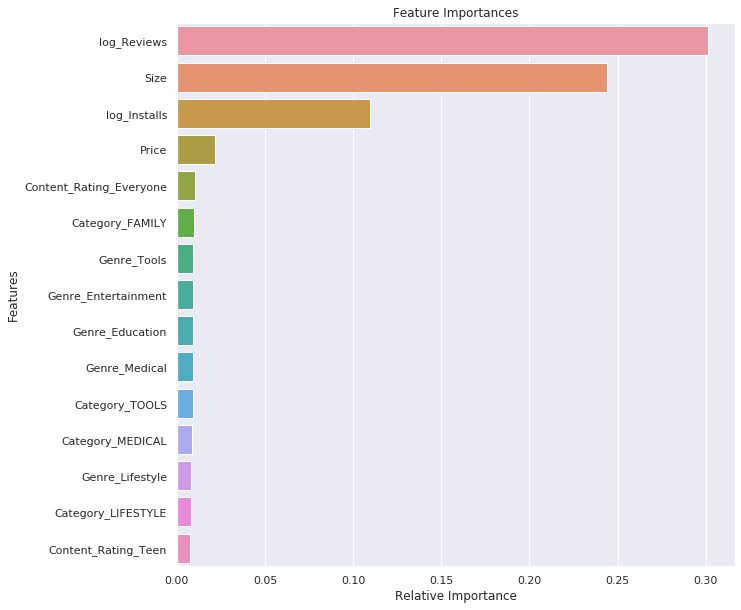

In [ ]:
importances = ml_pipe.named_steps['reg'].feature_importances_
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in ml_pipe.named_steps['reg'].estimators_],
             axis=0)
top = 15
plt.figure(figsize=(10, 10))
ax = sns.barplot(x=importances[indices][:top], y=feat_names[indices][:top])
ax.set_title('Feature Importances')
ax.set_xlabel('Relative Importance')
ax.set_ylabel('Features')
plt.show()



In [ ]:
Y_pred_train = ml_pipe.predict(X_train)
Y_pred_test = ml_pipe.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [ ]:
residuals_train = Y_train - Y_pred_train
residuals_test = Y_test - Y_pred_test

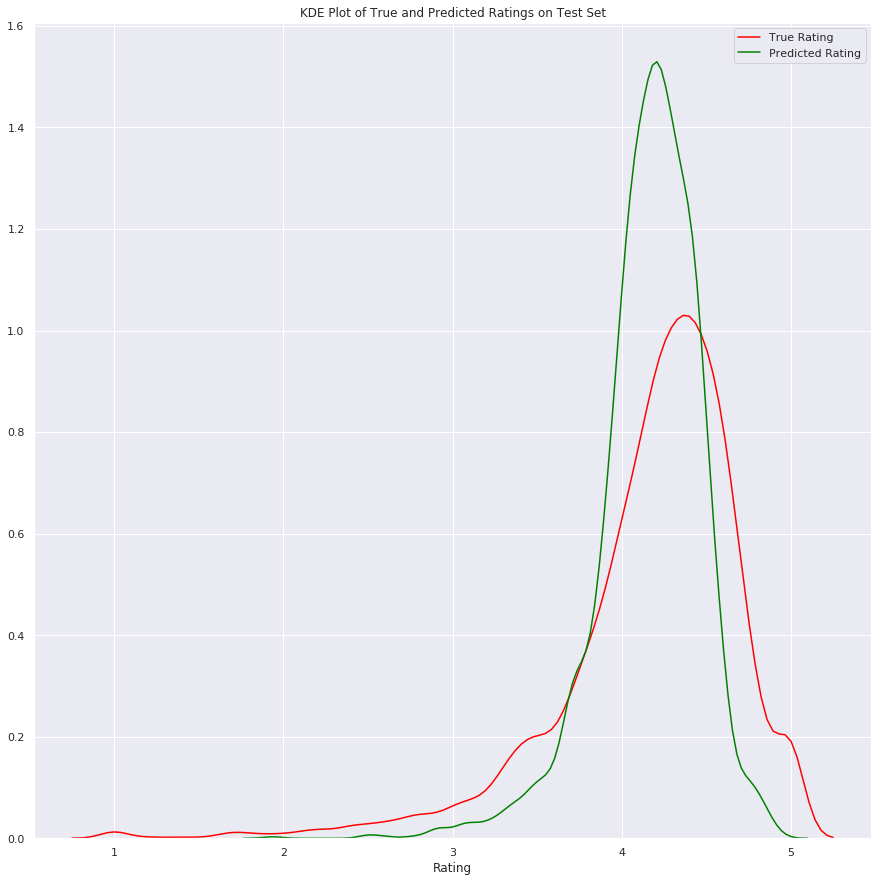

In [ ]:
plt.figure(figsize=(15,15))
ax = sns.distplot(Y_test, hist=False, kde=True, color='red', label='True Rating')
sns.distplot(Y_pred_test, hist=False, kde=True, color='green', label='Predicted Rating')
plt.title('KDE Plot of True and Predicted Ratings on Test Set')
plt.show()

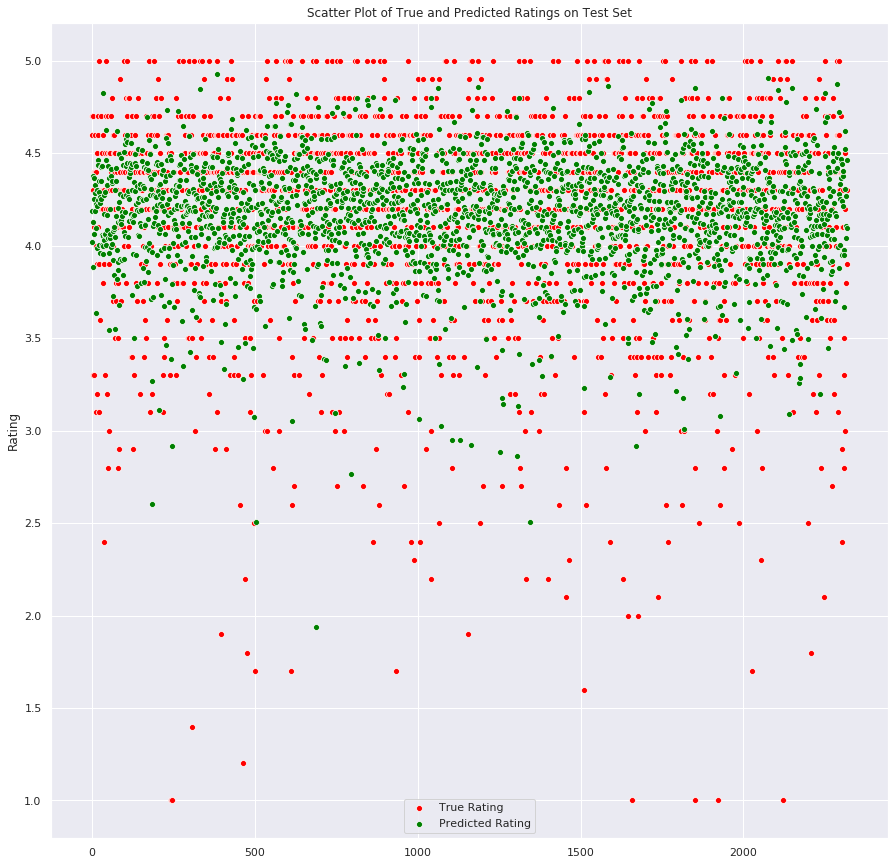

In [ ]:
plt.figure(figsize=(15,15))
ax = sns.scatterplot(x=range(len(Y_test)), y=Y_test, color='red', label='True Rating')
ax = sns.scatterplot(x=range(len(Y_test)), y=Y_pred_test, color='green', label='Predicted Rating', ax=ax)
plt.title('Scatter Plot of True and Predicted Ratings on Test Set')
plt.show()

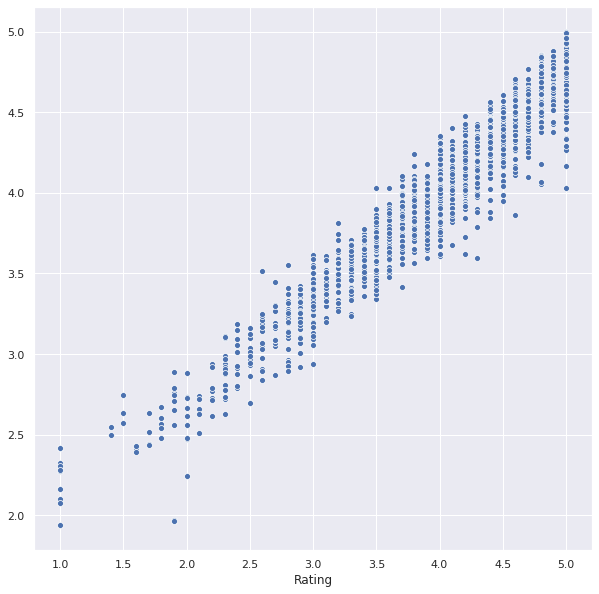

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=Y_train, y=Y_pred_train)

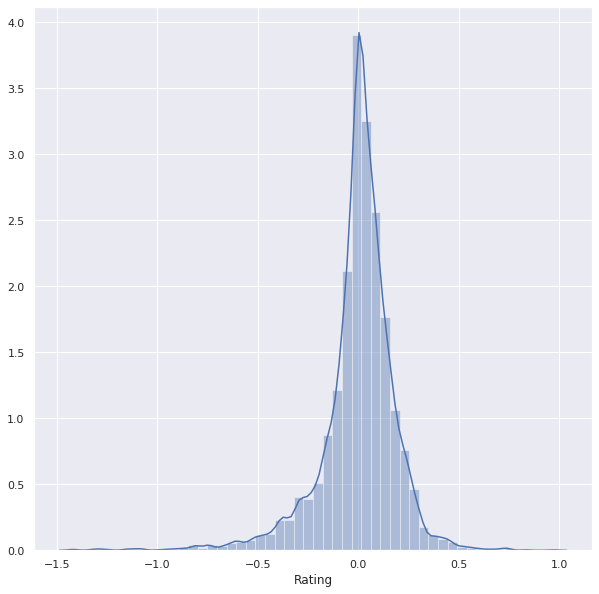

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(residuals_train)

Text(0.5, 0, 'Ratings_train')

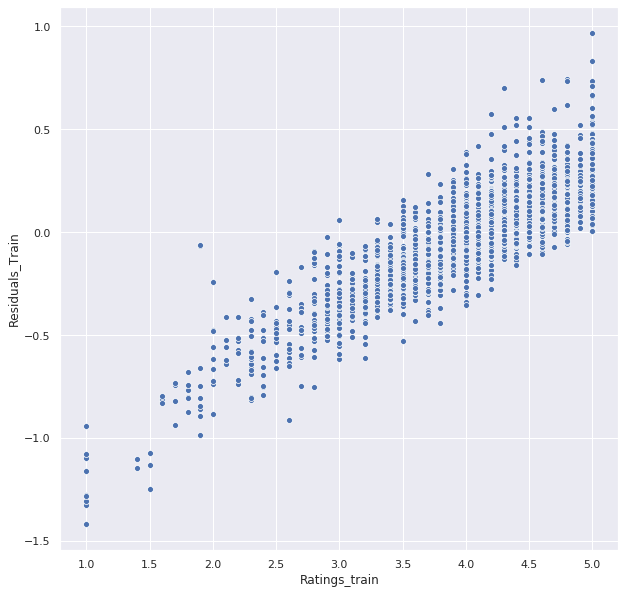

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x=Y_train, y=residuals_train)
ax.set_ylabel('Residuals_Train')
ax.set_xlabel('Ratings_train')

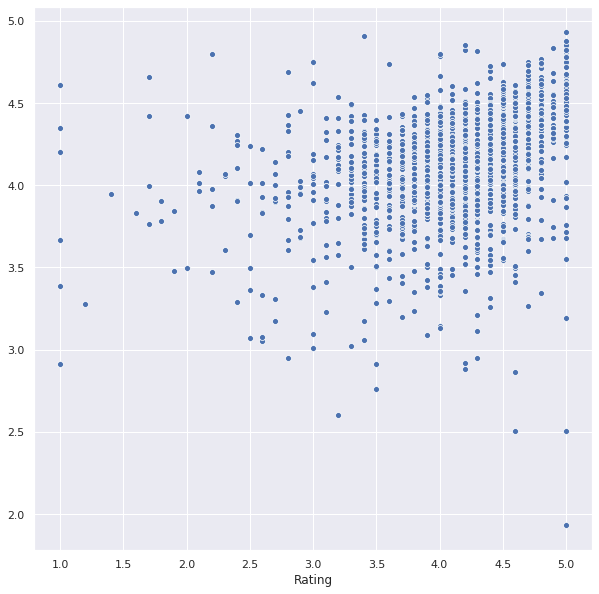

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=Y_test, y=Y_pred_test)

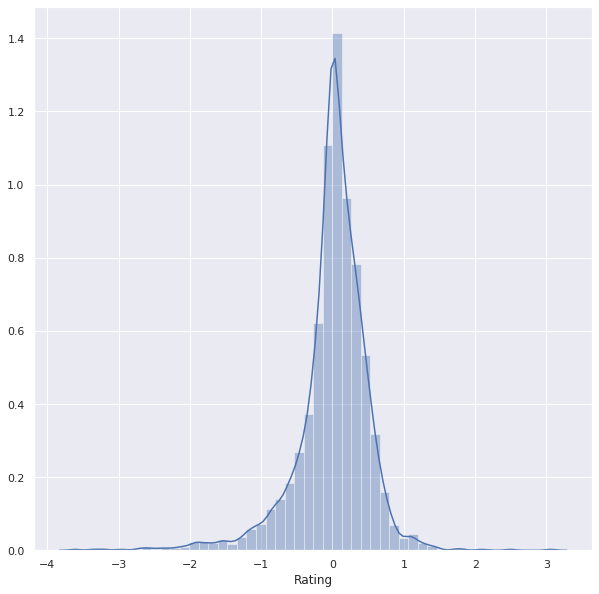

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(residuals_test)

Text(0.5, 0, 'Ratings_Test')

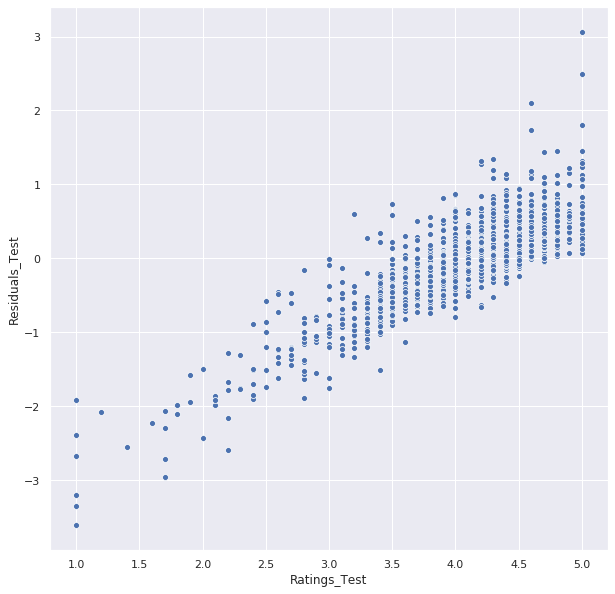

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x=Y_test, y=residuals_test)
ax.set_ylabel('Residuals_Test')
ax.set_xlabel('Ratings_Test')

In [ ]:
mse_train, mse_test = mean_squared_error(Y_train, Y_pred_train), mean_squared_error(Y_test, Y_pred_test)
mae_train, mae_test = mean_absolute_error(Y_train, Y_pred_train), mean_absolute_error(Y_test, Y_pred_test)

In [ ]:
print("Mean Squared Error on Training Set", mse_train)
print("Mean Squared Error on Test Set", mse_test)
print("Mean Absolute Error on Training Set", mae_train)
print("Mean Absolute Error on Test Set", mae_test)


Mean Squared Error on Training Set 0.03572053474543717
Mean Squared Error on Test Set 0.2596930001718496
Mean Absolute Error on Training Set 0.12467083793806581
Mean Absolute Error on Test Set 0.3375764083603819


## RidgeCV Regression

In [ ]:
ridge_pipe = Pipeline([
                       ('trans', column_trans),
                            ('ridge', RidgeCV(alphas = np.arange(0.1,5.0,0.2),cv=5))

])

In [ ]:
ridge_pipe.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('trans',
                 ColumnTransformer(n_jobs=None,
                                   remainder=StandardScaler(copy=True,
                                                            with_mean=True,
                                                            with_std=True),
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat_feats',
                                                  OneHotEncoder(categorical_features=None,
                                                                categories=None,
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                n_v

In [ ]:
Y_ridge_pred_train = ridge_pipe.predict(X_train)
Y_ridge_pred_test = ridge_pipe.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [ ]:
ridge_residuals_train = Y_train - Y_ridge_pred_train
ridge_residuals_test = Y_test - Y_ridge_pred_test

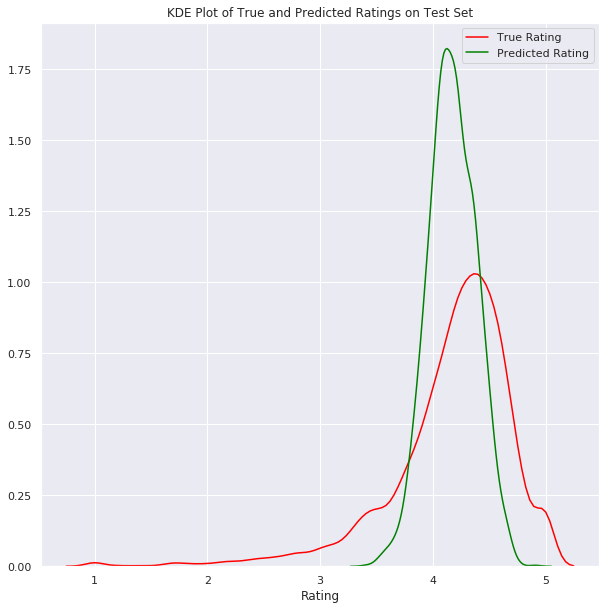

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.distplot(Y_test, hist=False, kde=True, color='red', label='True Rating')
sns.distplot(Y_ridge_pred_test, hist=False, kde=True, color='green', label='Predicted Rating')
plt.title('KDE Plot of True and Predicted Ratings on Test Set')
plt.show()

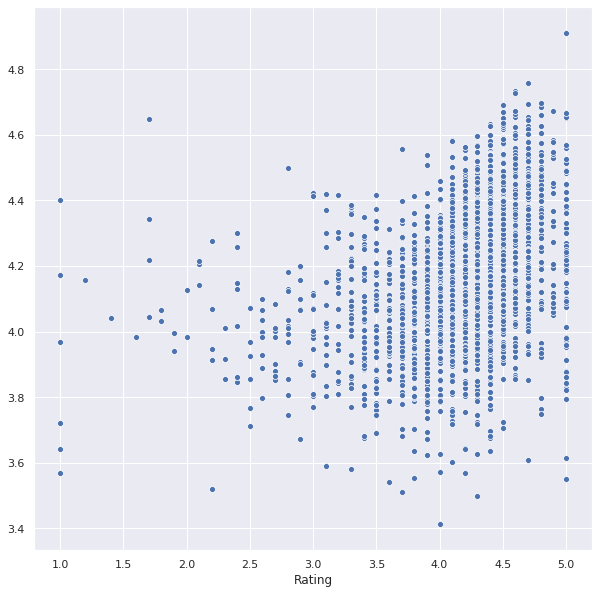

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=Y_test, y=Y_ridge_pred_test)

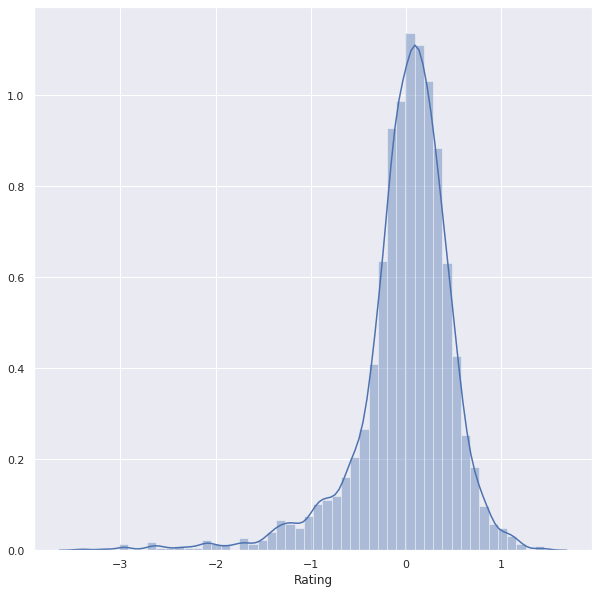

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(ridge_residuals_test)

Text(0.5, 0, 'Ratings_Test')

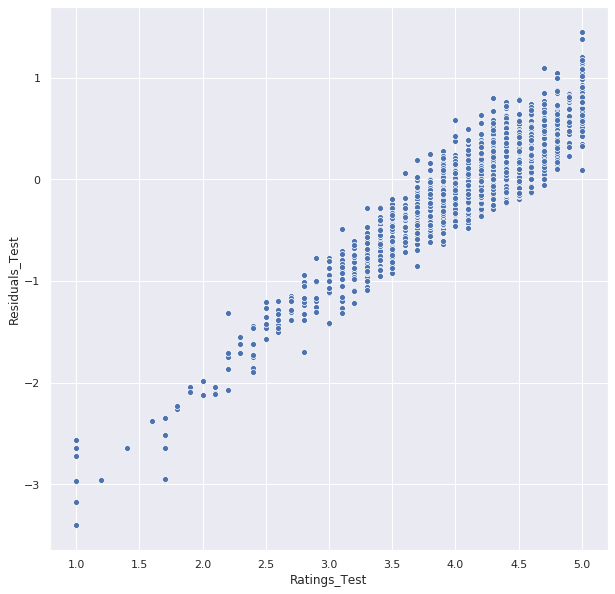

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x=Y_test, y=ridge_residuals_test)
ax.set_ylabel('Residuals_Test')
ax.set_xlabel('Ratings_Test')

In [ ]:
ridge_mse_train, ridge_mse_test = mean_squared_error(Y_train, Y_ridge_pred_train), mean_squared_error(Y_test, Y_ridge_pred_test)
ridge_mae_train, ridge_mae_test = mean_absolute_error(Y_train, Y_ridge_pred_train), mean_absolute_error(Y_test, Y_ridge_pred_test)

In [ ]:
print("Mean Squared Error on Training Set", ridge_mse_train)
print("Mean Squared Error on Test Set", ridge_mse_test)
print("Mean Absolute Error on Training Set", ridge_mae_train)
print("Mean Absolute Error on Test Set", ridge_mae_test)

Mean Squared Error on Training Set 0.25083443475922446
Mean Squared Error on Test Set 0.25636883916523967
Mean Absolute Error on Training Set 0.34833072177435453
Mean Absolute Error on Test Set 0.3486126742048762


## LassoCV Regression

In [ ]:
las_pipe = Pipeline([
                       ('trans', column_trans),
                            ('las', LassoCV(alphas = np.arange(0.1,5.0,0.2), cv=5))

])

In [ ]:
las_pipe.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('trans',
                 ColumnTransformer(n_jobs=None,
                                   remainder=StandardScaler(copy=True,
                                                            with_mean=True,
                                                            with_std=True),
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat_feats',
                                                  OneHotEncoder(categorical_features=None,
                                                                categories=None,
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                n_v

In [ ]:
Y_las_pred_train = las_pipe.predict(X_train)
Y_las_pred_test = las_pipe.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [ ]:
las_residuals_train = Y_train - Y_las_pred_train
las_residuals_test = Y_test - Y_las_pred_test

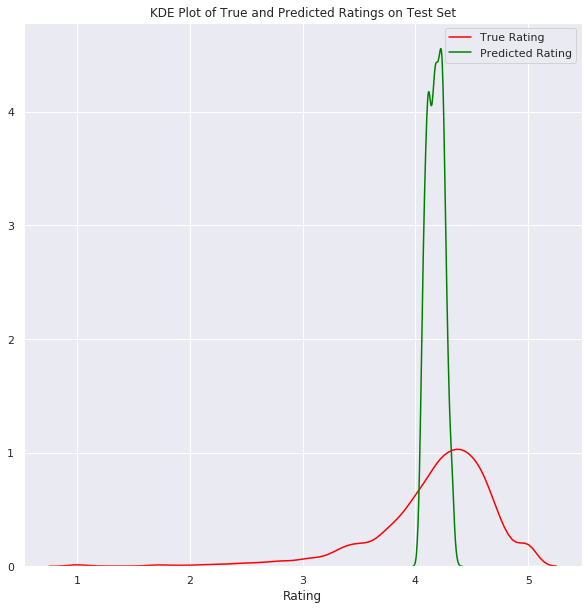

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.distplot(Y_test, hist=False, kde=True, color='red', label='True Rating')
sns.distplot(Y_las_pred_test, hist=False, kde=True, color='green', label='Predicted Rating')
plt.title('KDE Plot of True and Predicted Ratings on Test Set')
plt.show()

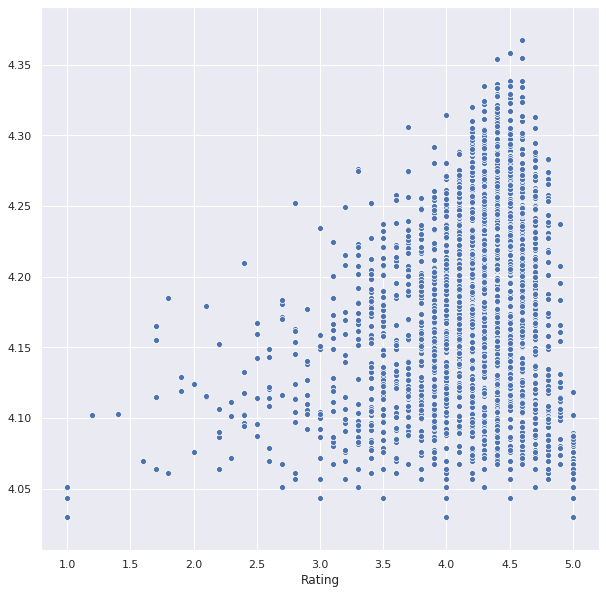

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=Y_test, y=Y_las_pred_test)

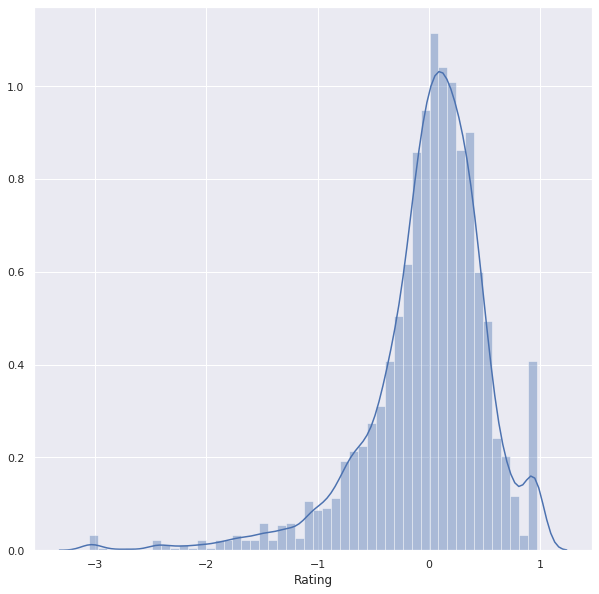

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(las_residuals_test)

Text(0.5, 0, 'Ratings_Test')

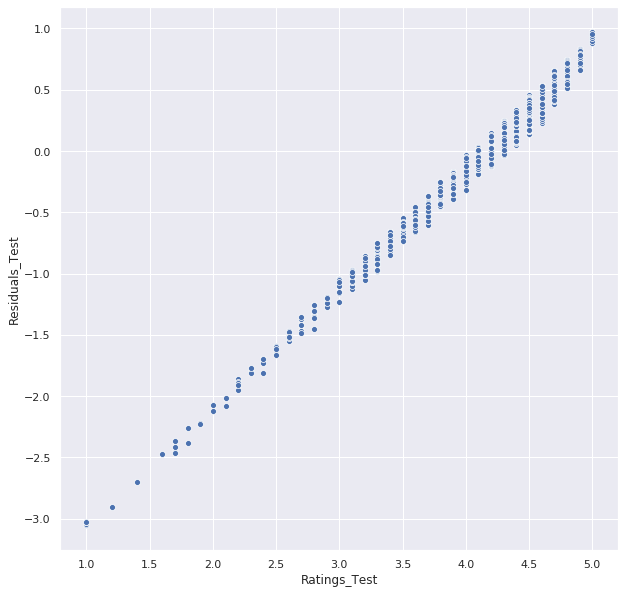

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x=Y_test, y=las_residuals_test)
ax.set_ylabel('Residuals_Test')
ax.set_xlabel('Ratings_Test')

In [ ]:
las_mse_train, las_mse_test = mean_squared_error(Y_train, Y_las_pred_train), mean_squared_error(Y_test, Y_las_pred_test)
las_mae_train, las_mae_test = mean_absolute_error(Y_train, Y_las_pred_train), mean_absolute_error(Y_test, Y_las_pred_test)

In [ ]:
print("Mean Squared Error on Training Set", las_mse_train)
print("Mean Squared Error on Test Set", las_mse_test)
print("Mean Absolute Error on Training Set", las_mae_train)
print("Mean Absolute Error on Test Set", las_mae_test)

Mean Squared Error on Training Set 0.2870875042559694
Mean Squared Error on Test Set 0.2889833866369642
Mean Absolute Error on Training Set 0.37662276393754934
Mean Absolute Error on Test Set 0.37804595251205164


## Linear Regression

In [ ]:
lr_pipe = Pipeline([
                       ('trans', column_trans),
                            ('lr', LinearRegression())

])

In [ ]:
lr_pipe.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('trans',
                 ColumnTransformer(n_jobs=None,
                                   remainder=StandardScaler(copy=True,
                                                            with_mean=True,
                                                            with_std=True),
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat_feats',
                                                  OneHotEncoder(categorical_features=None,
                                                                categories=None,
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                n_v

In [ ]:
Y_lr_pred_train = lr_pipe.predict(X_train)
Y_lr_pred_test = lr_pipe.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [ ]:
lr_residuals_train = Y_train - Y_lr_pred_train
lr_residuals_test = Y_test - Y_lr_pred_test

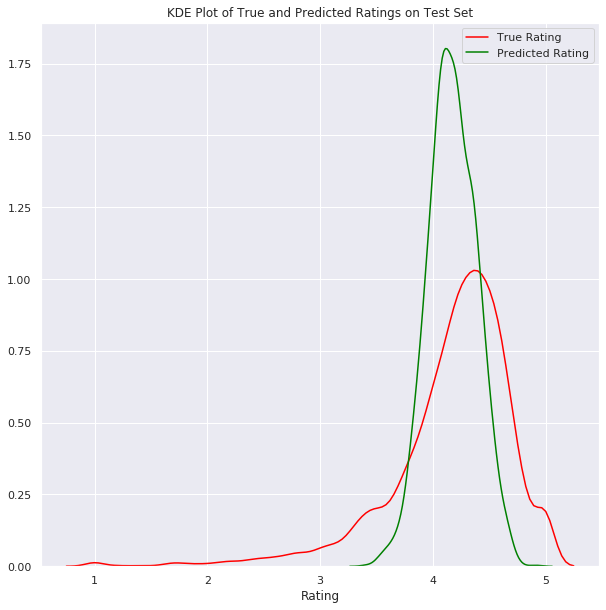

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.distplot(Y_test, hist=False, kde=True, color='red', label='True Rating')
sns.distplot(Y_lr_pred_test, hist=False, kde=True, color='green', label='Predicted Rating')
plt.title('KDE Plot of True and Predicted Ratings on Test Set')
plt.show()

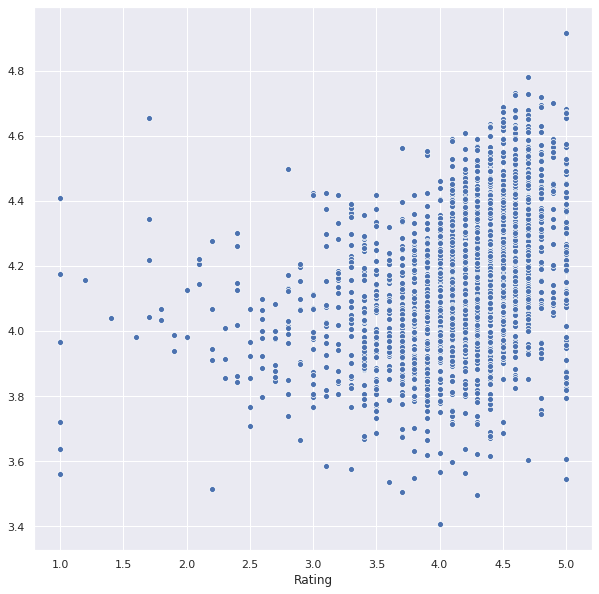

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=Y_test, y=Y_lr_pred_test)

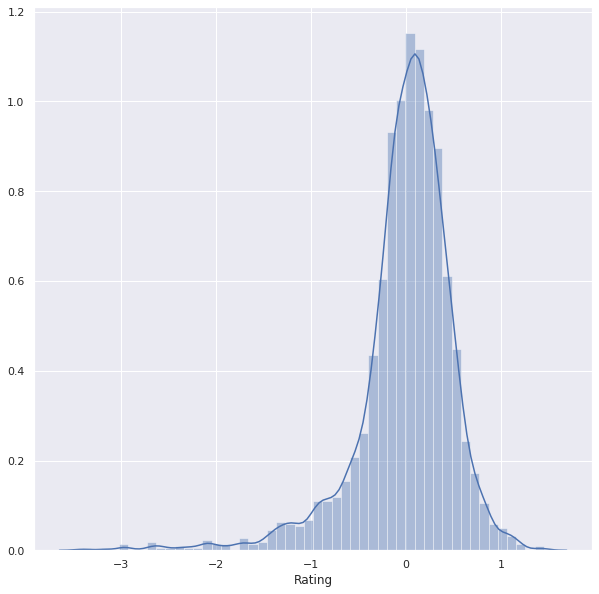

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(lr_residuals_test)

Text(0.5, 0, 'Ratings_Test')

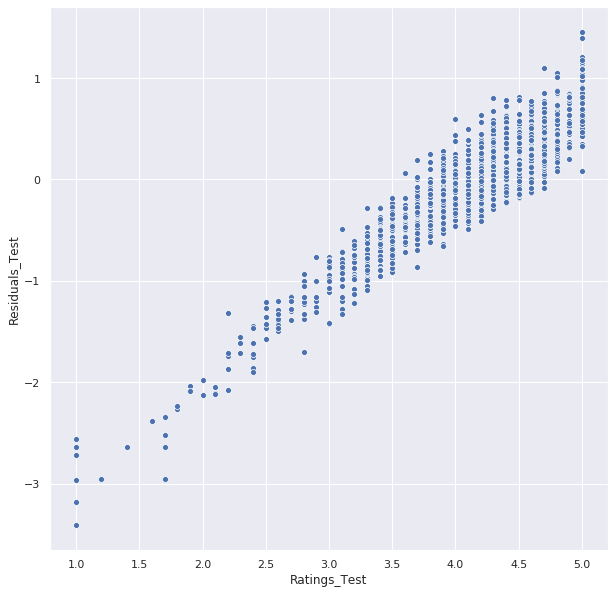

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x=Y_test, y=lr_residuals_test)
ax.set_ylabel('Residuals_Test')
ax.set_xlabel('Ratings_Test')

In [ ]:
lr_mse_train, lr_mse_test = mean_squared_error(Y_train, Y_lr_pred_train), mean_squared_error(Y_test, Y_lr_pred_test)
lr_mae_train, lr_mae_test = mean_absolute_error(Y_train, Y_lr_pred_train), mean_absolute_error(Y_test, Y_lr_pred_test)

In [ ]:
print("Mean Squared Error on Training Set", lr_mse_train)
print("Mean Squared Error on Test Set", lr_mse_test)
print("Mean Absolute Error on Training Set", lr_mae_train)
print("Mean Absolute Error on Test Set", lr_mae_test)

Mean Squared Error on Training Set 0.25074577177729673
Mean Squared Error on Test Set 0.2565663371876906
Mean Absolute Error on Training Set 0.34828033373131895
Mean Absolute Error on Test Set 0.3489739509567855


## Huber Regressor

In [ ]:
hr_pipe = Pipeline([
                       ('trans', column_trans),
                            ('hr', HuberRegressor())

])

In [ ]:
hr_pipe.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('trans',
                 ColumnTransformer(n_jobs=None,
                                   remainder=StandardScaler(copy=True,
                                                            with_mean=True,
                                                            with_std=True),
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat_feats',
                                                  OneHotEncoder(categorical_features=None,
                                                                categories=None,
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                n_v

In [ ]:
Y_hr_pred_train = hr_pipe.predict(X_train)
Y_hr_pred_test = hr_pipe.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [ ]:
hr_residuals_train = Y_train - Y_hr_pred_train
hr_residuals_test = Y_test - Y_hr_pred_test

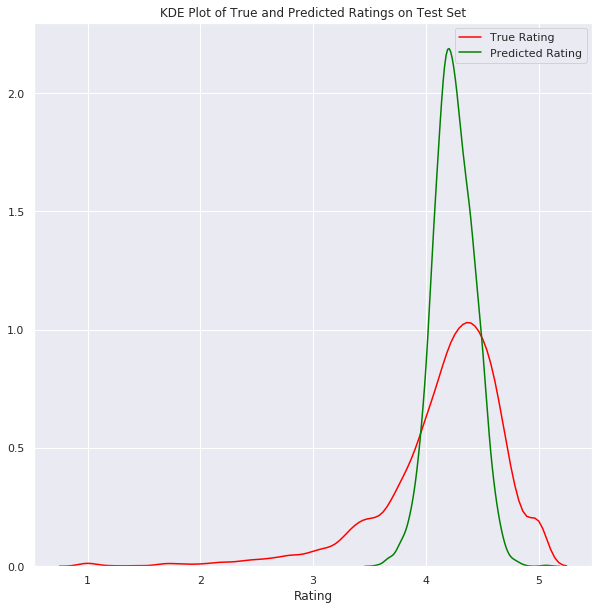

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.distplot(Y_test, hist=False, kde=True, color='red', label='True Rating')
sns.distplot(Y_hr_pred_test, hist=False, kde=True, color='green', label='Predicted Rating')
plt.title('KDE Plot of True and Predicted Ratings on Test Set')
plt.show()

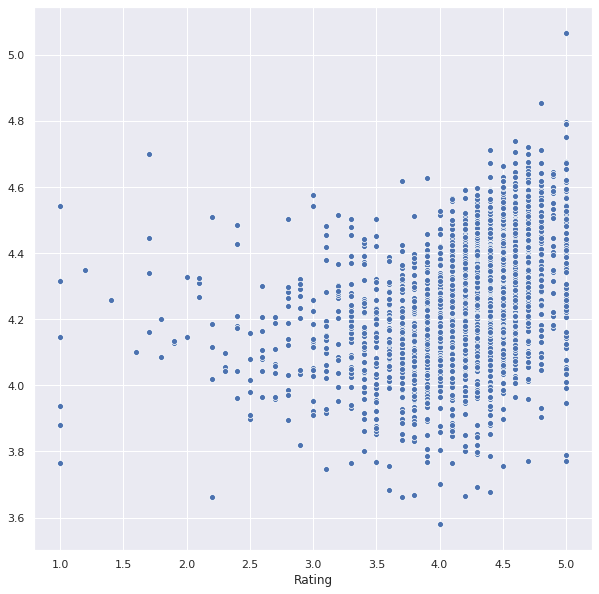

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=Y_test, y=Y_hr_pred_test)

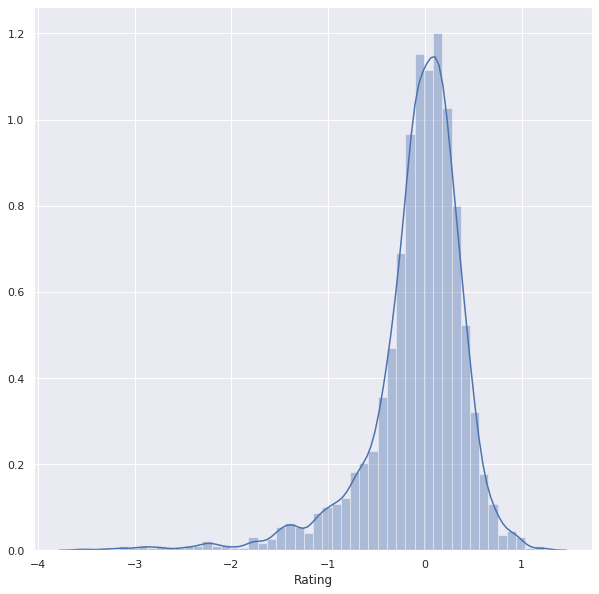

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(hr_residuals_test)

Text(0.5, 0, 'Ratings_Test')

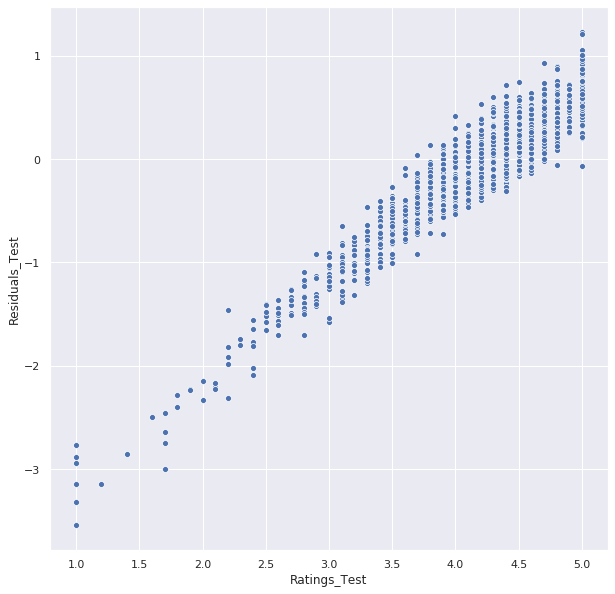

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x=Y_test, y=hr_residuals_test)
ax.set_ylabel('Residuals_Test')
ax.set_xlabel('Ratings_Test')

In [ ]:
hr_mse_train, hr_mse_test = mean_squared_error(Y_train, Y_hr_pred_train), mean_squared_error(Y_test, Y_hr_pred_test)
hr_mae_train, hr_mae_test = mean_absolute_error(Y_train, Y_hr_pred_train), mean_absolute_error(Y_test, Y_hr_pred_test)

In [ ]:
print("Mean Squared Error on Training Set", hr_mse_train)
print("Mean Squared Error on Test Set", hr_mse_test)
print("Mean Absolute Error on Training Set", hr_mae_train)
print("Mean Absolute Error on Test Set", hr_mae_test)

Mean Squared Error on Training Set 0.2614733853578029
Mean Squared Error on Test Set 0.2664800764901002
Mean Absolute Error on Training Set 0.338903395192692
Mean Absolute Error on Test Set 0.3412844934369073


In [ ]:
List = []

LinearRegressionDict = {
          'model_name': 'Linear Regression',
          'mse_Train' : lr_mse_train,
          'mae_Train': lr_mae_train,
          'mse_Test': lr_mse_test,
          'mae_Test': lr_mae_test
}

RidgeCVDict = {
          'model_name': 'Ridge CV',
          'mse_Train' : ridge_mse_train,
          'mae_Train': ridge_mae_train,
          'mse_Test': ridge_mse_test,
          'mae_Test': ridge_mae_test
}

LassoCVDict = {
          'model_name': 'Lasso CV',
          'mse_Train' : las_mse_train,
          'mae_Train': las_mae_train,
          'mse_Test': las_mse_test,
          'mae_Test': las_mae_test
}

RandomForestDict = {
          'model_name': 'Random Forest',
          'mse_Train' : mse_train,
          'mae_Train': mae_train,
          'mse_Test': mse_test,
          'mae_Test': mae_test
}

HuberRegressorDict = {
          'model_name': 'Huber Regressor',
          'mse_Train' : hr_mse_train,
          'mae_Train': hr_mae_train,
          'mse_Test': hr_mse_test,
          'mae_Test': hr_mae_test
}

List.append(LinearRegressionDict)
List.append(RidgeCVDict)
List.append(LassoCVDict)
List.append(RandomForestDict)
List.append(HuberRegressorDict)

results_df = pd.DataFrame(List)

In [ ]:
results_df

,model_name,mse_Train,mae_Train,mse_Test,mae_Test
0,Linear Regression,0.250746,0.348280,0.256566,0.348974
1,Ridge CV,0.250834,0.348331,0.256369,0.348613
2,Lasso CV,0.287088,0.376623,0.288983,0.378046
3,Random Forest,0.035721,0.124671,0.259693,0.337576
4,Huber Regressor,0.261473,0.338903,0.266480,0.341284


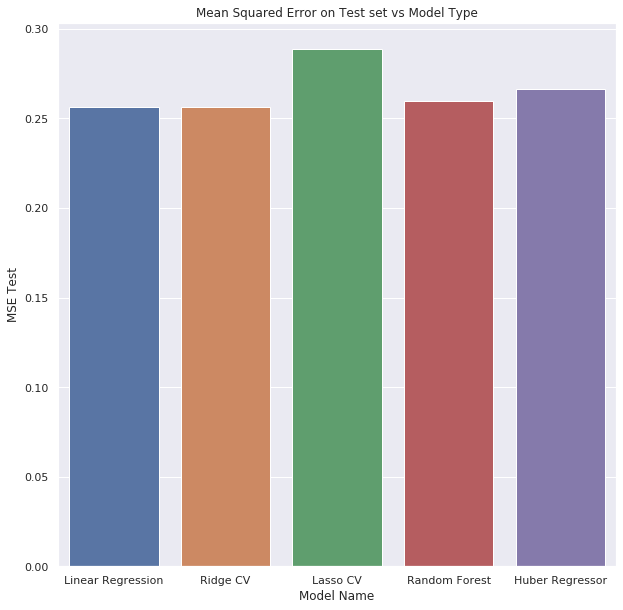

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x='model_name', y='mse_Test', data=results_df)
ax.set_xlabel("Model Name")
ax.set_ylabel("MSE Test")
ax.set_title("Mean Squared Error on Test set vs Model Type")
plt.savefig('MSE VS Model Type.png')
plt.show()

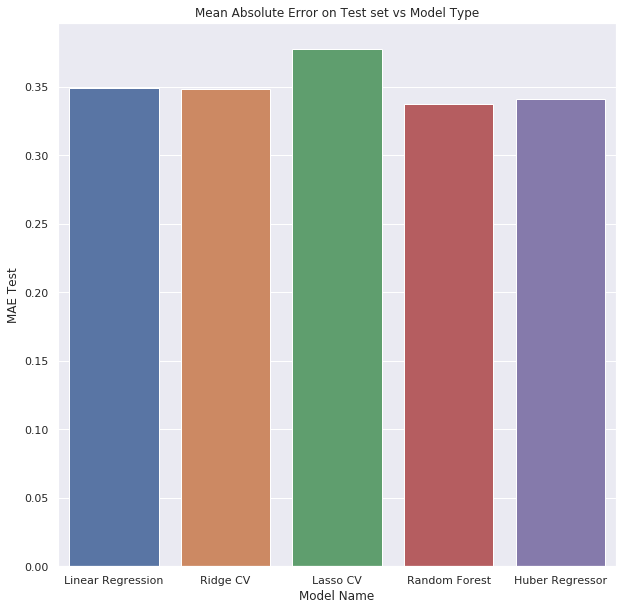

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x='model_name', y='mae_Test', data=results_df)
ax.set_xlabel("Model Name")
ax.set_ylabel("MAE Test")
ax.set_title("Mean Absolute Error on Test set vs Model Type")
plt.savefig('MAE VS Model Type.png')
plt.show()